In [1077]:
import pandas as pd

In [1078]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [1079]:
dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,No,Female,0,No,No,13,One year,No,Mailed check,55.15,742.90
7252,9992-RRAMN,Yes,Male,0,Yes,No,22,Month-to-month,Yes,Electronic check,85.10,1873.70
7253,9992-UJOEL,No,Male,0,No,No,2,Month-to-month,Yes,Mailed check,50.30,92.75
7254,9993-LHIEB,No,Male,0,Yes,Yes,67,Two year,No,Mailed check,67.85,4627.65


In [1080]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   Contract          7256 non-null   object 
 8   PaperlessBilling  7256 non-null   object 
 9   PaymentMethod     7256 non-null   object 
 10  Charges.Monthly   7256 non-null   float64
 11  Charges.Total     7256 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.4+ KB


In [1081]:
import plotly.express as px

In [1082]:
px.histogram(dados, x='Churn', text_auto=True)

In [1083]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [1084]:
# Verificar valores nulos
print("Valores nulos por coluna:\n", dados.isnull().sum())

Valores nulos por coluna:
 customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64


In [1085]:
# Preencher valores nulos da coluna Churn com 0
dados['Churn'] = dados['Churn'].fillna('No')

In [1086]:
# Conferir
print(dados['Churn'].value_counts())

Churn
No     5387
Yes    1869
Name: count, dtype: int64


In [1087]:
le_churn = LabelEncoder()
dados['Churn'] = le_churn.fit_transform(dados['Churn'])
print(le_churn.classes_)  # Mostra quais classes foram codificadas

['No' 'Yes']


In [1088]:
# Substitui 0/1 por No/Yes
dados["Churn"] = dados["Churn"].map({0: "No", 1: "Yes"})

In [1089]:
px.histogram(
    dados,
    x='Churn',
    barmode='group',      # barras lado a lado
    text_auto=True
)

A maioria dos clientes não cancelou (5.387) em comparação aos que cancelaram (1.869).
Isso indica uma taxa de churn de aproximadamente 26% na base.
Apesar da maioria se manter, o número de cancelamentos ainda é significativo.

In [1090]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   Contract          7256 non-null   object 
 8   PaperlessBilling  7256 non-null   object 
 9   PaymentMethod     7256 non-null   object 
 10  Charges.Monthly   7256 non-null   float64
 11  Charges.Total     7256 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.4+ KB


In [1091]:
import plotly.express as px

# a coluna recebe Yes/No na legenda
dados = dados.copy()
dados["Churn"] = dados["Churn"].map({0: "No", 1: "Yes", "No": "No", "Yes": "Yes"})

fig = px.histogram(
    dados,
    x="Partner",
    color="Churn",       # usar a coluna label
    barmode="group",
    text_auto=True,
    category_orders={
        "Partner": ["No", "Yes"],
        "Churn": ["No", "Yes"]
    }
)

fig.update_layout(legend_title_text="Churn", bargap=0.15)
fig.show()



O gráfico mostra que clientes com parceiro apresentam menor proporção de churn (669 de 3.509 ≈ 19%) do que os sem parceiro (1.200 de 3.747 ≈ 32%).
Isso sugere que ter parceiro pode estar associado a maior fidelização.
A diferença entre os grupos indica que o status de parceria é um fator relevante para prever churn.

In [1092]:

fig = px.histogram(
    dados,
    x="gender",
    color="Churn",
    barmode="group",
    text_auto=True,
    category_orders={
        "gender": ["Female", "Male"],
        "Churn": ["No", "Yes"]
    },
    labels={"gender": "gender", "Churn": "Churn"}
)

fig.update_layout(legend_title_text="Churn", bargap=0.15)
fig.show()



Homens e mulheres apresentam comportamento de churn muito parecido.
Não há diferença expressiva na taxa de cancelamento entre os gêneros.
Portanto, gênero não parece ser um fator determinante no churn.

In [1093]:

fig = px.histogram(
    dados,
    x="Dependents",
    color="Churn",
    barmode="group",
    text_auto=True,
    category_orders={
        "Dependents": ["No", "Yes"],
        "Churn": ["No", "Yes"]
    }
)

fig.update_layout(legend_title_text="Churn", bargap=0.15)
fig.show()

Clientes sem dependentes têm taxa de churn mais alta (1.543) que os com dependentes (326).
Ter dependentes pode estar associado a maior estabilidade e fidelidade ao serviço.
Logo, dependentes funcionam como fator de retenção.

In [1094]:
fig = px.histogram(
    dados,
    x="Contract",
    color="Churn",
    barmode="group",
    text_auto=True,
    category_orders={
        "Contract": ["One year", "Month-to-month"],
        "Churn": ["No", "Yes"]
    },
    labels={"Contract": "Contract", "Churn": "Churn"}
)

fig.update_layout(legend_title_text="Churn", bargap=0.15)
fig.show()



O contrato Month-to-Month concentra a maioria dos cancelamentos (1.655).
Já contratos de 1 ano e 2 anos apresentam churn muito reduzido.
Isso mostra que contratos longos reduzem drasticamente o risco de saída.

In [1095]:
# Conferir
print(dados['Contract'].value_counts())

Contract
Month-to-month    4005
Two year          1733
One year          1518
Name: count, dtype: int64


In [1096]:
# Substitui 0/1 por No/Yes
dados["SeniorCitizen"] = dados["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [1097]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   object 
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   Contract          7256 non-null   object 
 8   PaperlessBilling  7256 non-null   object 
 9   PaymentMethod     7256 non-null   object 
 10  Charges.Monthly   7256 non-null   float64
 11  Charges.Total     7256 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 680.4+ KB


In [1098]:
# Coluna recebe Yes/No na legenda
dados = dados.copy()
dados["SeniorCitizen"] = dados["SeniorCitizen"].map({0: "No", 1: "Yes", "No": "No", "Yes": "Yes"})
fig = px.histogram(
    dados,
    x="SeniorCitizen",
    color="Churn",
    barmode="group",
    text_auto=True,
    category_orders={
        "SeniorCitizen ": ["No", "Yes"],
        "Churn": ["No", "Yes"]
    },
    labels={"SeniorCitizen ": "SeniorCitizen ", "Churn": "Churn"}
)

fig.update_layout(legend_title_text="Churn", bargap=0.15)
fig.show()

A maioria dos clientes não é idosa, e entre eles a taxa de churn é menor. Já entre os idosos, a proporção de cancelamentos é relativamente maior. Isso sugere que a idade pode influenciar na decisão de permanecer ou sair.

In [1099]:
fig = px.histogram(
    dados,
    x="PaperlessBilling",
    color="Churn",
    barmode="group",
    text_auto=True,
    category_orders={
        "PaperlessBilling": ["No", "Yes"],
        "Churn": ["No", "Yes"]
    },
    labels={"PaperlessBilling": "PaperlessBilling", "Churn": "Churn"}
)

fig.update_layout(legend_title_text="Churn", bargap=0.15)
fig.show()

Clientes com faturamento eletrônico têm maior taxa de churn em relação aos que recebem a conta impressa. Isso pode indicar uma correlação com perfis mais digitais e exigentes. Estratégias de retenção podem focar nesse grupo.

In [1100]:
fig = px.histogram(
    dados,
    x="PaymentMethod",
    color="Churn",
    barmode="group",
    text_auto=True,
    category_orders={
        "PaymentMethod": ["Mailed check", "Electronic check"],
        "Churn": ["No", "Yes"]
    },
    labels={"PaymentMethod": "PaymentMethod", "Churn": "Churn"}
)

fig.update_layout(legend_title_text="Churn", bargap=0.15)
fig.show()

O método "Electronic check" apresenta a maior taxa de churn comparado aos demais meios de pagamento. Já pagamentos automáticos (cartão ou transferência) estão associados a menor churn. Métodos mais automatizados parecem fidelizar clientes.

In [1101]:
# Conferir
print(dados['PaymentMethod'].value_counts())

PaymentMethod
Electronic check             2445
Mailed check                 1657
Bank transfer (automatic)    1587
Credit card (automatic)      1567
Name: count, dtype: int64


Já exploramos as variáveis categóricas, que são as colunas na nossa base de dados em formato textual, com diferentes categorias para cada uma das linhas. Agora, vamos explorar as variáveis numéricas.

In [1102]:
px.box(dados, x = 'tenure', color = 'Churn')

Clientes que cancelam possuem tempo médio de permanência significativamente menor. Já os que permanecem têm uma distribuição de tenure bem maior e mais estável. Isso mostra que fidelização aumenta com o tempo de contrato.

In [1103]:
px.box(dados, x = 'Charges.Monthly', color = 'Churn')

Clientes que cancelaram (Yes) tendem a ter mensalidades mais altas em média.
Já os que permanecem (No) estão mais concentrados em valores menores.
Isso sugere que custos mensais elevados aumentam a chance de churn.

In [1104]:
px.box(dados, x = 'Charges.Total', color = 'Churn')

Clientes que ficaram (No) apresentam valores totais pagos muito mais altos, reflexo de maior permanência.
Os que cancelaram (Yes) concentram-se em valores baixos, indicando saída precoce.
Ou seja, clientes de longo prazo acumulam mais receita e são menos propensos ao churn.

Variável Alvo e Variável Explicativa

In [1105]:
dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,No,Female,No,No,No,13,One year,No,Mailed check,55.15,742.90
7252,9992-RRAMN,Yes,Male,No,Yes,No,22,Month-to-month,Yes,Electronic check,85.10,1873.70
7253,9992-UJOEL,No,Male,No,No,No,2,Month-to-month,Yes,Mailed check,50.30,92.75
7254,9993-LHIEB,No,Male,No,Yes,Yes,67,Two year,No,Mailed check,67.85,4627.65


In [1106]:
x = dados.drop(columns=['Churn', 'customerID'])
y = dados['Churn']

In [1107]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,No,Yes,Yes,9,One year,Yes,Mailed check,65.60,593.30
1,Male,No,No,No,9,Month-to-month,No,Mailed check,59.90,542.40
2,Male,No,No,No,4,Month-to-month,Yes,Electronic check,73.90,280.85
3,Male,Yes,Yes,No,13,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Female,Yes,Yes,No,3,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...
7251,Female,No,No,No,13,One year,No,Mailed check,55.15,742.90
7252,Male,No,Yes,No,22,Month-to-month,Yes,Electronic check,85.10,1873.70
7253,Male,No,No,No,2,Month-to-month,Yes,Mailed check,50.30,92.75
7254,Male,No,Yes,Yes,67,Two year,No,Mailed check,67.85,4627.65


In [1108]:
y

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7251,No
7252,Yes
7253,No
7254,No


In [1109]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   object 
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   Contract          7256 non-null   object 
 8   PaperlessBilling  7256 non-null   object 
 9   PaymentMethod     7256 non-null   object 
 10  Charges.Monthly   7256 non-null   float64
 11  Charges.Total     7256 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 680.4+ KB


In [1110]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [1111]:
colunas = x.columns

In [1112]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
))

In [1113]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','Contract','PaperlessBilling','PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [1114]:
x = one_hot.fit_transform(x)

In [1115]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__gender_Male', 'onehotencoder__SeniorCitizen_Yes',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year',
       'onehotencoder__Contract_Two year',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__tenure',
       'remainder__Charges.Monthly', 'remainder__Charges.Total'],
      dtype=object)

In [1116]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_Yes,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90
7252,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70
7253,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75
7254,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65


In [1117]:
from sklearn.preprocessing import LabelEncoder

In [1118]:
label_encoder = LabelEncoder()

In [1119]:
y = label_encoder.fit_transform(y)

In [1120]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [1121]:
from sklearn.model_selection import train_test_split

In [1122]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, stratify=y, random_state=5, shuffle=True)


In [1123]:
from sklearn.dummy import DummyClassifier

In [1124]:
dummy = DummyClassifier()

In [1125]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

DummyClassifier()

In [1126]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.7425578831312017

Ao executar esse código, obtemos uma taxa de acerto de 0,74. Isso significa que, em 74% das vezes, esse modelo realizou a classificação de forma correta.

In [1127]:
from sklearn.tree import DecisionTreeClassifier


In [1128]:
arvore = DecisionTreeClassifier(random_state =5)

In [1129]:
arvore = DecisionTreeClassifier(random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [1130]:
arvore.predict(x_teste)

array([0, 1, 0, ..., 1, 0, 0])

In [1131]:
arvore.score(x_teste, y_teste)

0.7188533627342889

In [1132]:
x_teste

array([[1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 5.20000e+01,
        7.54000e+01, 3.86545e+03],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 2.20000e+01,
        5.11000e+01, 1.23290e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.90000e+01,
        2.53500e+01, 5.66100e+02],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.20000e+01,
        4.94500e+01, 1.03140e+03],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 4.00000e+00,
        2.52000e+01, 1.02500e+02],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.99000e+01, 1.99000e+01]])

In [1133]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [1134]:
nome_colunas = ['gender',
                'SeniorCitizen',
                'Partner',
                'Dependents',
                'Contract_Month-to-month',
                'Contract_One year',
                'Contract_Two year',
                'PaperlessBilling',
                'PaymentMethod_Bank transfer (automatic)',
                'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check',
                'remainder__tenure','remainder__Charges.Monthly','remainder__Charges.Total']


In [1135]:
plt.figure(figsize = (15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

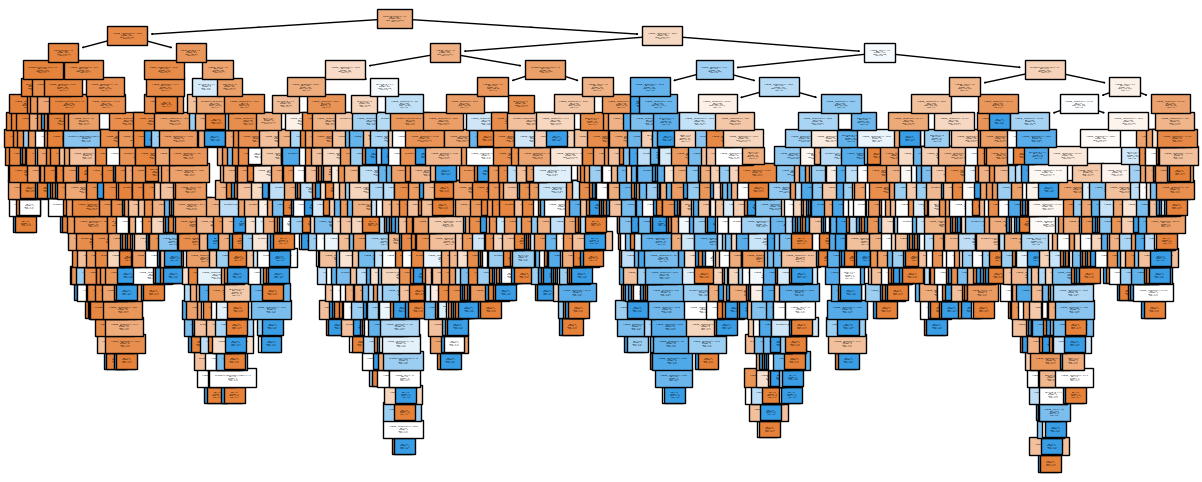

In [1136]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 1, feature_names = nome_colunas);

In [1137]:
arvore.score(x_treino, y_treino)

0.992098493201029

O modelo não está, de fato, aprendendo com os dados, mas sim memorizando esse resultado

In [1138]:
arvore = DecisionTreeClassifier(random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [1139]:
arvore = DecisionTreeClassifier(max_depth = 3, random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [1140]:
arvore.score(x_treino, y_treino)

0.788680632120544

In [1141]:
arvore.score(x_teste, y_teste)

0.7877618522601985

O resultado obtido foi de quase 79,6%. Esse resultado melhorou em relação ao modelo inicial. Isso indica que quando fazemos essa "poda" na árvore, ao utilizar uma quantidade de profundidade máxima da árvore, o modelo tentará entender melhor o padrão dos dados existentes e não apenas decorar o resultado dos dados de treinamento.

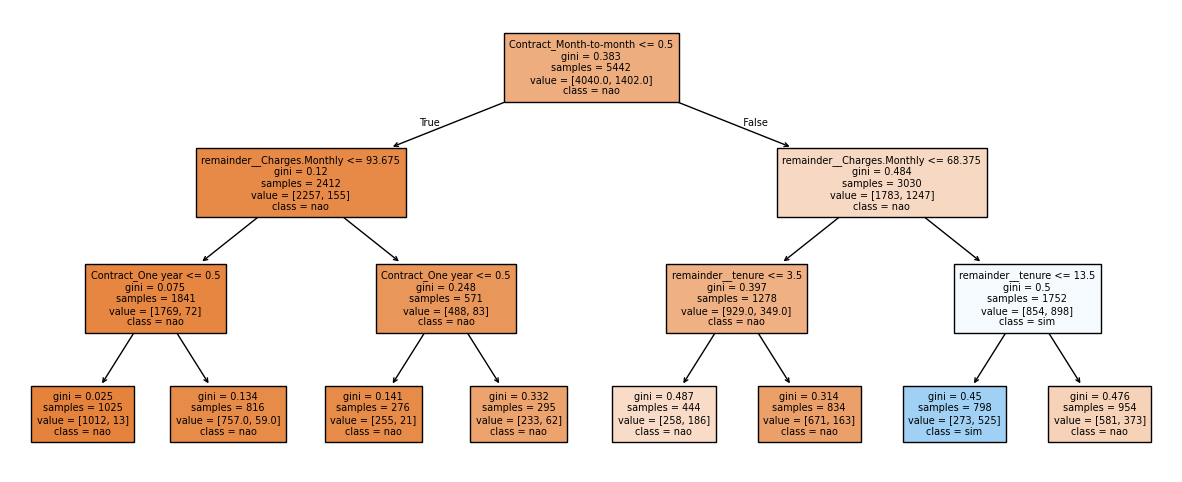

In [1142]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 7, feature_names = nome_colunas);

In [1143]:
from sklearn.preprocessing import MinMaxScaler

In [1144]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [1145]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.014085,0.357214,0.009560
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.323944,0.619403,0.238824
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.967662,0.970038
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.394366,0.012935,0.058043
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.084507,0.682090,0.069415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.985915,0.286567,0.374429
5438,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.887324,0.624876,0.590417
5439,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.098592,0.359701,0.052654
5440,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.774648,0.573134,0.489545


In [1146]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [1147]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [1148]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [1149]:
knn.score(x_teste_normalizado, y_teste)

0.7552370452039692

Ele obteve um resultado de 75%. Foium resultado satisfatório, melhor que o modelo dummy, mas precisaremos comparar  os resultados desse modelo com o modelo de árvore de decisão.

In [1150]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.7425578831312017
Acurácia Árvore: 0.7877618522601985
Acurácia KNN: 0.7552370452039692


In [1151]:
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [1152]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [1153]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [1154]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9926486486486487
Acurácia de validação: 0.7347600518806745


In [1155]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.8806486486486487
Acurácia de validação: 0.767833981841764


O nosso modelo continua errando mesmo para os dados de treinamento. Entretanto, nos dados de validação, ele obteve uma acurácia de 0.76. Não foi a mesma dos dados de treinamento, mas melhorou em relação ao modelo anterior que era de 0.73.
Ou seja, Até o momento, criamos um modelo inicial para classificar clientes inadimplentes de uma empresa de empréstimo de automóveis e obtivemos uma acurácia de validação de cerca de 76%.

In [1156]:
from sklearn.metrics import confusion_matrix

In [1157]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[992 153]
 [205 192]]


In [1158]:
from sklearn.metrics import ConfusionMatrixDisplay

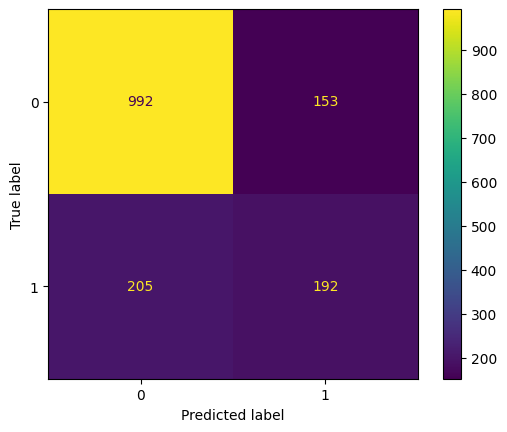

In [1159]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

Onde, 0 → Cliente NÃO saiu

1 → Cliente saiu

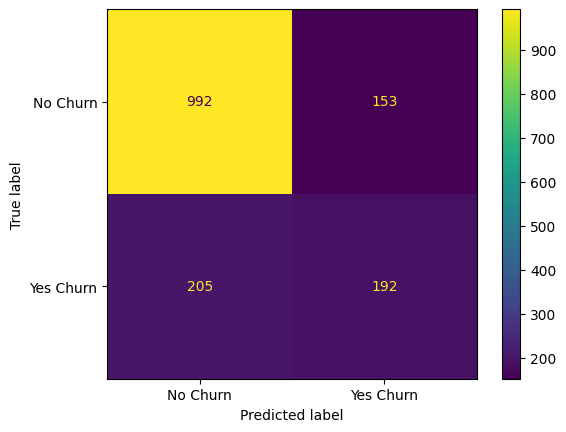

In [1160]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['No Churn', 'Yes Churn'])
visualizacao.plot();

O valor de 206, que está na segunda linha e na primeira coluna, representa as pessoas verdadeiramente yes Churn que foram classificadas No Churn pelo modelo. Ou seja, o modelo errou ao classificá-las no churn, isto é, que elas não cancelariam o contrato, quando, na realidade, cancelariam.

Algo semelhante ocorre com o valor 153, no canto superior direito. Esse é o número de clientes que o modelo classificou como quem cancelaria, mas que não cancelariam. Eles não cancelariam o contrato, mas o modelo sugeriu que eles cancelariam o contrato. Portanto, o modelo errou novamente, porém de maneira diferente.

Por fim, temos o valor "192", no canto inferior direito. Esse valor corresponde aos clientes que cancelariam e que o modelo também classificou como isso mesmo. Portanto, o modelo acertou nesse caso.

Podemos ver que nosso modelo não está apresentando resultados tão bons quanto esperávamos. Embora a acurácia tenha obtido uma taxa de acerto de 76%, ao identificarmos os clientes inadimplentes, notamos que ele identificou apenas 191 deles, quando que na verdade seriam quase 400 pessoas.

A matriz de confusão se provou muito útil para identificarmos que a acurácia não é uma métrica que sempre precisamos utilizar. Ela não é a mais importante, pois não vai nos ajudar a entender todas as nuances do nosso modelo. Além disso, a matriz de confusão também foi importante para identificar que o modelo não está classificando bem as pessoas "yes churn".

In [1161]:
from sklearn.metrics import accuracy_score

In [1162]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.767833981841764


Percebemos que a acurácia não é uma métrica muito adequada para o nosso problema, pois identificamos que nosso modelo não está identificando bem as pessoas em situação de inadimplência.

Portanto, as métricas que vamos explorar agora serão especificamente aquelas voltadas para abordar esses "verdadeiros positivos", que são o valor mais importante para o nosso problema.

In [1163]:
from sklearn.metrics import precision_score, recall_score

In [1164]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')

Precisão: 0.5565217391304348


In [1165]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.5565217391304348
Recall: 0.4836272040302267


 Encontramos uma precisão de 0.55 aproximadamente e um recall de 0.5, aproximadamente, indicando que a performance do nosso modelo é razoálvel.

In [1166]:
from sklearn.metrics import f1_score

In [1167]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.5175202156334232


 F1 Score, valor esse que é considerado razoável, justamente porque as nossas métricas de precisão e recall é razoável.

Quanto melhor for o recall, menos pessoas que estão Yes Churn serão classificadas como No Churn.

In [1168]:
from sklearn.metrics import RocCurveDisplay

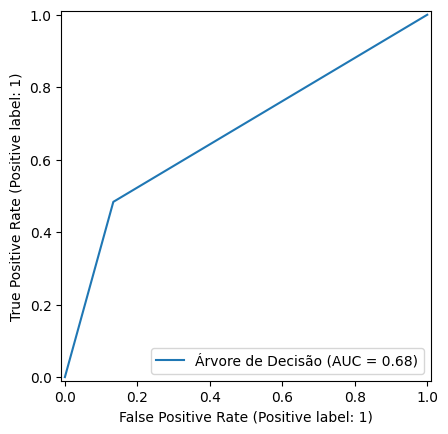

In [1169]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

Quando a curva se aproxima de uma linha diagonal traçada no gráfico, indica que o modelo é ineficiente, classificando os dados de maneira aleatória. O que não acontece claramente no nosso caso.

In [1170]:
from sklearn.metrics import roc_auc_score

In [1171]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.6750013749408775


Essa métrica estava próxima de um valor de 0,68, e quanto mais perto de 0,5, pior será o resultado do modelo. Logo, o nosso resultado é de fato razoável.

In [1172]:
from sklearn.metrics import PrecisionRecallDisplay

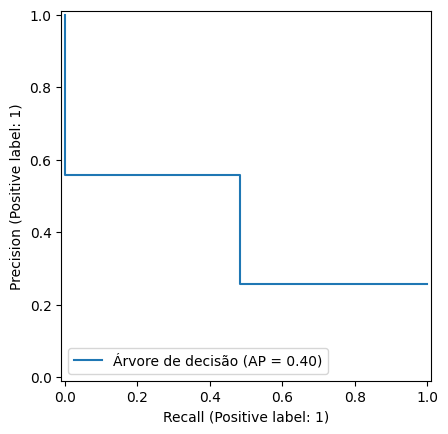

In [1173]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

Para analisar esse gráfico, ele é diferente da curva ROC. Em vez de quanto mais próximo do ponto 0,1, melhor (ou seja, do canto superior esquerdo), teremos que o modelo vai ser melhor nesse equilíbrio entre essas duas métricas, quanto mais próximo do ponto 1,1 (ou seja, do canto superior direito).

E quanto mais próximo do ponto 0,0, do canto inferior esquerdo, pior será o modelo. No nosso caso, vemos que a curva está muito próxima do ponto 0,0.

No nosso caso, o modelo consegue razoavelmente equilibrar bem as duas tarefas e detectar eficientemente os clientes yes churn, tanto para não perder clientes quanto para evitar vendas para clientes que não pagarão.

In [1174]:
from sklearn.metrics import average_precision_score

In [1175]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.40209328095265895


Relatório de métricas Classification-report

In [1176]:
from sklearn.metrics import classification_report

In [1177]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1145
           1       0.56      0.48      0.52       397

    accuracy                           0.77      1542
   macro avg       0.69      0.68      0.68      1542
weighted avg       0.76      0.77      0.76      1542



✅ O modelo obteve acurácia de 76%, o que indica um desempenho razoável no geral.
📊 Para a classe 0 (clientes que ficaram), o desempenho é bom (precisão 0.83 e recall 0.86), mostrando que o modelo identifica bem quem vai permanecer.
⚠️ Já para a classe 1 (clientes que cancelaram), o desempenho é bem mais fraco (precisão 0.55 e recall 0.48), o que significa que o modelo tem dificuldade em prever quem realmente vai sair.

In [1178]:
from sklearn.model_selection import cross_validate, KFold

In [1179]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [1180]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.0210917 , 0.01994658, 0.02222323, 0.01955867, 0.01998925]),
 'score_time': array([0.00120139, 0.00117159, 0.00115037, 0.00114465, 0.00124478]),
 'test_score': array([0.7560778 , 0.72852512, 0.76236821, 0.73317113, 0.7810219 ])}

In [1181]:
cv_resultados['test_score']

array([0.7560778 , 0.72852512, 0.76236821, 0.73317113, 0.7810219 ])

In [1182]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.7135368455772793, 0.7909288144657567]


In [1183]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [1184]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.02018189, 0.02097726, 0.02065921, 0.01964521, 0.01984167]),
 'score_time': array([0.00304532, 0.00296903, 0.00290847, 0.00285244, 0.00288868]),
 'test_score': array([0.48888889, 0.4972067 , 0.49032258, 0.42222222, 0.50344828])}

In [1185]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.4212984690030951, 0.5395369996084873]


In [1186]:
dados['Churn'].value_counts(normalize = True)

,proportion
Churn,
No,0.74242
Yes,0.25758


In [1187]:
from sklearn.model_selection import StratifiedKFold

In [1188]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring='recall')

In [1189]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.37532413085924576, 0.590626308598723]


In [1190]:
from imblearn.over_sampling import SMOTE

In [1191]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [1197]:
y_balanceado = pd.Series(y_balanceado)
y_balanceado.value_counts(normalize = True)


,proportion
0,0.5
1,0.5


In [1198]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring = 'recall')

In [1199]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7984202768858302, 0.8573985600626508]


Validação

In [1200]:
from imblearn.pipeline import Pipeline as imbpipeline

In [1201]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [1202]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [1203]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.4800446858450719, 0.6358928575551225]


In [1204]:
from imblearn.under_sampling import NearMiss

In [1205]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])

In [1206]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [1207]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.5867209395224791, 0.7041625396355073]


In [1208]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [1209]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

In [1210]:
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       808
           1       0.42      0.64      0.51       281

    accuracy                           0.68      1089
   macro avg       0.63      0.67      0.64      1089
weighted avg       0.74      0.68      0.70      1089



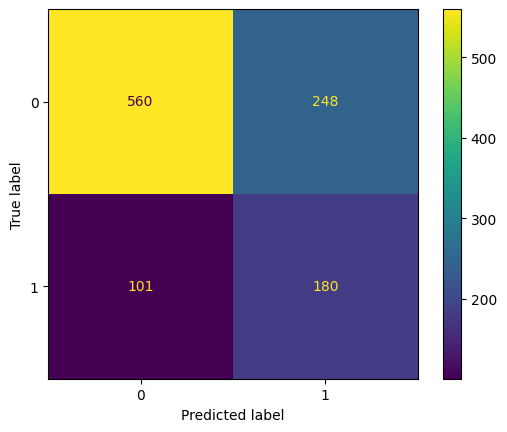

In [1211]:
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

1️⃣ Resultado 1

Métricas:

Classe 0 (Não Churn): precision 0.83, recall 0.87 → modelo identifica bem clientes que ficam.

Classe 1 (Churn): precision 0.56, recall 0.48 → dificuldade em identificar clientes que saem.

Acurácia: 77% → boa, mas puxada pela maioria (classe 0).

Macro F1: 0.68 → mostra desequilíbrio entre classes.

Matriz de confusão:

992 acertos em Não Churn, apenas 153 falsos positivos.

192 acertos em Churn, mas 205 churns não detectados (falsos negativos).

👉 Interpretação: o modelo é conservador, prefere prever que clientes ficam. Isso dá alta acurácia, mas falha em prever churn (que é justamente o mais importante para ação estratégica).

2️⃣ Resultado 2

Métricas:

Classe 0 (Não Churn): precision 0.85, recall 0.69 → perdeu recall, ou seja, erra mais clientes que ficam.

Classe 1 (Churn): precision 0.42, recall 0.64 → melhorou recall (captura mais churns), mas com custo de mais falsos positivos.

Acurácia: 68% → caiu em relação ao modelo 1.

Macro F1: 0.64 → mais balanceado, mas menos estável.

Matriz de confusão:

560 acertos em Não Churn, mas 248 falsos positivos (clientes previstos como churn, mas que ficam).

180 acertos em Churn, e 101 churns não detectados (melhor que no modelo 1).

👉 Interpretação: o modelo é mais agressivo na detecção de churn, reduzindo falsos negativos, mas sacrificando a precisão e a acurácia global.

Resumo Final da Análise

O Resultado 1 tem melhor acurácia geral e acerta mais clientes que permanecem, mas deixa passar quase metade dos clientes que realmente churnam → ruim para uma estratégia preventiva.

O Resultado 2 tem menor acurácia global, mas melhor recall para churn, identificando mais clientes que saem → útil para campanhas de retenção, embora traga mais falsos positivos.

🔑 Conclusão Estratégica:

Se a empresa valoriza prever corretamente quem fica (evitar custo com campanhas desnecessárias), o modelo 1 é mais indicado.

Se a empresa prioriza não perder clientes que vão sair, mesmo com custo de alertar alguns erroneamente, o modelo 2 é mais adequado.

📌 Melhorias possíveis:

Ajustar threshold de decisão para encontrar equilíbrio entre recall e precision da classe churn.

Aplicar SMOTE/class_weight para balancear as classes.

Investir em feature engineering (ex.: histórico de chamadas, nível de suporte usado, tempo de contrato) para dar mais poder preditivo ao modelo.

📊 Comparação entre os modelos

Critério	Modelo 1 (Conservador)	Modelo 2 (Agressivo)
Acurácia	0.77 (maior)	0.68 (menor)
Recall Churn (classe 1)	0.48 (baixo)	0.64 (melhor)
Precision Churn	0.56 (menos falsos positivos)	0.42 (mais falsos positivos)
F1 Churn	0.52	0.51 (similar)
Matriz de Confusão	205 churns não detectados (altos falsos negativos)	248 falsos positivos (clientes que ficam, mas previstos como churn)
Equilíbrio entre classes	Mais enviesado para "Não Churn"	Mais balanceado, mas com custo na precisão
Macro F1	0.68 (mais estável)	0.64 (um pouco pior)

✅ Pontos Fortes e ❌ Fracos

Modelo	Pontos Fortes	Pontos Fracos
Modelo 1	✔️ Alta acurácia geral (77%)
✔️ Bom em prever clientes que ficam (Não Churn)
✔️ Menos falsos positivos (custo menor em campanhas desnecessárias)	❌ Baixo recall para Churn (perde quase metade dos clientes que saem)
❌ Menor utilidade para ações de retenção
Modelo 2	✔️ Melhor recall para Churn (captura mais clientes que vão sair)
✔️ Mais útil para campanhas de retenção
✔️ Mais balanceado entre as classes	❌ Menor acurácia geral (68%)
❌ Mais falsos positivos (clientes que ficam, mas previstos como churn)
❌ Precision baixa na classe churn
🎯 Conclusão Estratégica

Se a prioridade da TelecomX for economizar em campanhas de retenção → Modelo 1 é mais adequado.

Se a prioridade for não perder clientes que estão para sair (mesmo com custo de campanhas extras) → Modelo 2 é a melhor escolha.
